In [44]:
import pandas as pd

In [45]:
df = pd.read_csv("era_test_split.csv")
df_sample = df.sample(n=1000, random_state=42)
df = df_sample

In [47]:
import pandas as pd

# Load all models
print("\n=== LOADING MODELS ===")
w2v_models = load_w2v_models(W2V_BASE_DIR)
roberta_models = load_roberta_models(ROBERTA_BASE_DIR)
tfidf_models = load_tfidf_models(Path(TFIDF_BASE_DIR))

# Example 1: Single prediction
# print("\n=== SINGLE PREDICTION EXAMPLE ===")
# text = """
# If I had to live my life without you near me
# The days would all be empty
# The nights would seem so long
# With you I see forever, oh, so clearly
# I might have been in love before
# But it never felt this strong
# """

# result = predict_all_methods(text, w2v_models, roberta_models, tfidf_models)

# print(f"\nCleaned Lyrics: {result['cleaned_lyrics'][:100]}...")
# print("\n=== CONFIDENCE SCORES ===")

# # Group by era for display
# eras = set()
# for key in result.keys():
#     if key.startswith("conf_"):
#         era = key.split("_", 2)[2]
#         eras.add(era)

# for era in sorted(eras):
#     print(f"\n{era}:")
#     if f"conf_w2v_{era}" in result:
#         print(f"  W2V:     {result[f'conf_w2v_{era}']:.4f}")
#     if f"conf_tfidf_{era}" in result:
#         print(f"  TF-IDF:  {result[f'conf_tfidf_{era}']:.4f}")
#     if f"conf_roberta_{era}" in result:
#         print(f"  RoBERTa: {result[f'conf_roberta_{era}']:.4f}")

# print("\n=== PREDICTIONS ===")
# print(f"W2V:     {result['pred_w2v']}")
# print(f"TF-IDF:  {result['pred_tfidf']}")
# print(f"RoBERTa: {result['pred_roberta']}")

# Example 2: Apply to DataFrame
print("\n\n=== DATAFRAME EXAMPLE ===")

# Load your dataframe
# df = pd.read_csv("your_lyrics_data.csv")

# Example DataFrame
# df = pd.DataFrame({
#     "song_id": [1, 2, 3],
#     "cleaned_lyrics": [
#         "if i had to live my life without you near me",
#         "baby one more time hit me baby one more time",
#         "wake me up inside call my name and save me"
#     ]
# })

print("Original DataFrame:")
print(df)

# Apply predictions
df_with_preds = apply_predictions_to_dataframe(
    df, 
    w2v_models, 
    roberta_models, 
    tfidf_models,
    lyrics_col="clean_lyrics"
)

print("\n\nDataFrame with predictions:")
print(df_with_preds.head())

print("\n\nColumn names:")
print(df_with_preds.columns.tolist())

# Save to CSV
df_with_preds.to_csv("lyrics_with_predictions.csv", index=False)
print("\n✓ Saved to lyrics_with_predictions.csv")


=== LOADING MODELS ===
✓ Loaded W2V: 1970s
✓ Loaded W2V: 1980s
✓ Loaded W2V: 1990s
✓ Loaded W2V: 2000s
✓ Loaded W2V: 2010s
✓ Loaded W2V: 2020s
✓ Loaded RoBERTa: 1970s
✓ Loaded RoBERTa: 1980s
✓ Loaded RoBERTa: 1990s
✓ Loaded RoBERTa: 2000s
✓ Loaded RoBERTa: 2010s
✓ Loaded RoBERTa: 2020s
✓ Loaded TF-IDF: 2000s
✓ Loaded TF-IDF: 1980s
✓ Loaded TF-IDF: 2020s
✓ Loaded TF-IDF: 2010s
✓ Loaded TF-IDF: 1970s
✓ Loaded TF-IDF: 1990s


=== DATAFRAME EXAMPLE ===
Original DataFrame:
            id                                       clean_lyrics  year  \
16170    41972  i don't really know what i want i don't really...  2007   
12248  7793735  born to a world full of tragedy wrapped in the...  1989   
6930    826283  my country's bigger than most and if asked i b...  1999   
33165  5917756  *playing demo version of jodeci's "love u   li...  1994   
49602  1006786  i wish i was in london walkin' in the rain i w...  1987   
...        ...                                                ...   ...   
5

100%|██████████| 1000/1000 [09:29<00:00,  1.76it/s]



DataFrame with predictions:
        id                                       clean_lyrics  year song_era  \
0    41972  i don't really know what i want i don't really...  2007    2000s   
1  7793735  born to a world full of tragedy wrapped in the...  1989    1980s   
2   826283  my country's bigger than most and if asked i b...  1999    1990s   
3  5917756  *playing demo version of jodeci's "love u   li...  1994    1990s   
4  1006786  i wish i was in london walkin' in the rain i w...  1987    1980s   

    tag  conf_w2v_1970s  conf_w2v_1980s  conf_w2v_1990s  conf_w2v_2000s  \
0   rap        0.234895        0.380417        0.523527        0.574220   
1  rock        0.263245        0.293422        0.562702        0.721662   
2   pop        0.908412        0.231998        0.447791        0.757418   
3    rb        0.245747        0.490195        0.666634        0.530107   
4   pop        0.547497        0.667685        0.378022        0.272250   

   conf_w2v_2010s  ...  conf_roberta_2

In [50]:
data = """era,rank,token,tfidf_score
1970s,1,you,0.05560247600491971
1970s,2,the,0.054349498842514866
1970s,3,and,0.03703524814372429
1970s,4,to,0.03413138457893541
1970s,5,me,0.025872411742353413
1970s,6,it,0.024441331844539792
1970s,7,love,0.02276404938030771
1970s,8,my,0.021423362132789878
1970s,9,in,0.020314091097214743
1970s,10,of,0.0202573369394982
1970s,11,that,0.01775543383471234
1970s,12,your,0.01701638359700029
1970s,13,on,0.016469328224729712
1970s,14,oh,0.01610577058172538
1970s,15,he,0.01550065069651087
1970s,16,we,0.014938469479343285
1970s,17,she,0.01476118907576667
1970s,18,be,0.01447997418431724
1970s,19,is,0.0136532133262012
1970s,20,can,0.013609563333225053
1970s,21,all,0.013593418946312802
1970s,22,for,0.013500607896440149
1970s,23,baby,0.012800946463310788
1970s,24,don,0.012457896050829299
1970s,25,re,0.01237573109007922
1970s,26,ll,0.012321491781815285
1970s,27,know,0.011971242023136024
1970s,28,there,0.011828215120434546
1970s,29,so,0.011716821306716385
1970s,30,but,0.011490210834721029
1970s,31,no,0.011397147818961405
1970s,32,ve,0.011273442358024282
1970s,33,do,0.011255312591179595
1970s,34,just,0.011229556346113808
1970s,35,was,0.011128540386611112
1970s,36,when,0.010577043031159274
1970s,37,with,0.010276120324511563
1970s,38,her,0.010199236246778235
1970s,39,got,0.009975741211221386
1970s,40,you re,0.009943835145141043
1970s,41,down,0.009856106720030466
1970s,42,time,0.009786564851052256
1970s,43,what,0.009784954706706452
1970s,44,now,0.009574005575774503
1970s,45,they,0.009515113427215534
1970s,46,in the,0.009317945777504465
1970s,47,come,0.009158254788736676
1970s,48,if,0.009035302284849531
1970s,49,have,0.009021212789492788
1970s,50,one,0.009003024515582327
1970s,51,yeah,0.008873013543773544
1970s,52,are,0.008724587345890744
1970s,53,well,0.008449315601810288
1970s,54,will,0.008410173100500478
1970s,55,like,0.008369013294104706
1970s,56,see,0.00834133434956067
1970s,57,way,0.008338940182421834
1970s,58,man,0.0082656698688771
1970s,59,as,0.008264967797932727
1970s,60,gonna,0.008232466516967709
1970s,61,go,0.008086491197124448
1970s,62,his,0.008080386313768702
1970s,63,let,0.007941004643659336
1970s,64,get,0.007824747318873667
1970s,65,away,0.0077201333747429065
1970s,66,never,0.007626287057572758
1970s,67,out,0.007574201937215453
1970s,68,day,0.007565085681841302
1970s,69,up,0.0073637590963591725
1970s,70,night,0.007268902407191943
1970s,71,say,0.0071292101546817765
1970s,72,good,0.007099610339979429
1970s,73,from,0.006761851567647376
1970s,74,at,0.0067517506641578484
1970s,75,long,0.006735314135575195
1970s,76,this,0.006706463273335404
1970s,77,by,0.006639224121701665
1970s,78,take,0.006602670102258858
1970s,79,make,0.006552371981073999
1970s,80,little,0.0064726157599369815
1970s,81,want,0.00647099184185714
1970s,82,life,0.00642523659760604
1970s,83,love you,0.006425050310548632
1970s,84,been,0.006420375096104448
1970s,85,home,0.006395154839959767
1970s,86,not,0.00633594053020506
1970s,87,here,0.006211363863039193
1970s,88,of the,0.006196409019957866
1970s,89,where,0.006185431549771605
1970s,90,on the,0.006176526826345442
1970s,91,ooh,0.006142635452654168
1970s,92,again,0.006101799518096366
1970s,93,more,0.006100385242892017
1970s,94,and the,0.00601570052048033
1970s,95,tell,0.006002426903226381
1970s,96,you know,0.005986418732859809
1970s,97,how,0.0059400741813346505
1970s,98,back,0.005912856228816328
1970s,99,hey,0.005877474088436253
1970s,100,could,0.005863836647677434
1980s,1,the,0.059412646474845954
1980s,2,you,0.05562018870774661
1980s,3,and,0.033922273677669645
1980s,4,to,0.03381317443669155
1980s,5,it,0.026474612027677615
1980s,6,me,0.023418075292492704
1980s,7,of,0.022429413483627234
1980s,8,in,0.022412205241244477
1980s,9,love,0.02016751259603257
1980s,10,my,0.01976675669916201
1980s,11,your,0.0190805497982613
1980s,12,we,0.01777682159904122
1980s,13,that,0.016654444684736938
1980s,14,on,0.016154843132023304
1980s,15,is,0.015833874470870698
1980s,16,for,0.014429358972735446
1980s,17,can,0.014308942651006604
1980s,18,he,0.014196993708559083
1980s,19,re,0.014164129862068865
1980s,20,oh,0.013834425481457337
1980s,21,all,0.013830844289827587
1980s,22,be,0.013613228935183496
1980s,23,she,0.013489994026947012
1980s,24,don,0.013340908381295353
1980s,25,no,0.012617671937744742
1980s,26,there,0.012204761369405726
1980s,27,so,0.011811604624290794
1980s,28,ll,0.011512184295545506
1980s,29,know,0.011068834620171584
1980s,30,what,0.01095879362692567
1980s,31,they,0.01093711680404357
1980s,32,but,0.010853418624399936
1980s,33,just,0.010797476922031783
1980s,34,you re,0.01060948564860481
1980s,35,with,0.01060847381676309
1980s,36,do,0.010414359167581903
1980s,37,ve,0.010393412180910265
1980s,38,when,0.010371527362150067
1980s,39,are,0.010168867943030672
1980s,40,one,0.009993389942216331
1980s,41,in the,0.00996288436452662
1980s,42,time,0.009590361417538353
1980s,43,will,0.0094583603274578
1980s,44,baby,0.009440868402068418
1980s,45,now,0.00938920755683091
1980s,46,was,0.00937855323651574
1980s,47,got,0.00919360634737585
1980s,48,this,0.009067557810281646
1980s,49,out,0.00899286069975628
1980s,50,like,0.008931136377451215
1980s,51,down,0.008929773886045815
1980s,52,never,0.008548269535022687
1980s,53,have,0.008417345279563374
1980s,54,her,0.00841727236054919
1980s,55,night,0.008362346169802031
1980s,56,up,0.008272499053337252
1980s,57,go,0.008227730892236372
1980s,58,come,0.008222915938240934
1980s,59,see,0.008110792449078748
1980s,60,if,0.008022044491618863
1980s,61,say,0.00797085184722994
1980s,62,away,0.0078028096855172835
1980s,63,heart,0.007741142916714411
1980s,64,get,0.0077195634838307745
1980s,65,as,0.007659970962591203
1980s,66,his,0.007610109368033221
1980s,67,way,0.007609633421543105
1980s,68,not,0.007471137104825081
1980s,69,gonna,0.007426753412912572
1980s,70,want,0.0074110775630516134
1980s,71,let,0.007384900662300642
1980s,72,from,0.007329990815472075
1980s,73,of the,0.007112856023439587
1980s,74,take,0.0070359686331198075
1980s,75,at,0.006940869906950076
1980s,76,on the,0.006861940183642425
1980s,77,life,0.0066756052067066945
1980s,78,well,0.00663309626387192
1980s,79,yeah,0.00660221672809042
1980s,80,our,0.006426847719206328
1980s,81,man,0.006422718262320172
1980s,82,by,0.006395599958544362
1980s,83,day,0.006319141492607156
1980s,84,world,0.006266339511241109
1980s,85,make,0.006249866398452066
1980s,86,here,0.00623354562971492
1980s,87,who,0.006040982948518747
1980s,88,again,0.005982536767960543
1980s,89,more,0.0059263658243145015
1980s,90,right,0.0058740932025604185
1980s,91,back,0.005850851650952067
1980s,92,feel,0.005820550113347689
1980s,93,to the,0.005768923715535514
1980s,94,too,0.005764481245034611
1980s,95,where,0.005670448000148428
1980s,96,could,0.005625347040421107
1980s,97,tell,0.005607515056715786
1980s,98,eyes,0.005536327734009905
1980s,99,only,0.00551971801196184
1980s,100,how,0.005508939169812702
1990s,1,the,0.06600564315395849
1990s,2,you,0.05580096166471337
1990s,3,and,0.03777781327193736
1990s,4,to,0.037273871761290225
1990s,5,it,0.027707298371405387
1990s,6,of,0.026145846267473755
1990s,7,my,0.02543998999866993
1990s,8,me,0.025280755643960828
1990s,9,in,0.024296966915466393
1990s,10,your,0.021175295750701123
1990s,11,that,0.018964332693436562
1990s,12,is,0.01789493793835391
1990s,13,we,0.01776912015277138
1990s,14,on,0.016800357680389854
1990s,15,for,0.015668807901823293
1990s,16,all,0.01524165486979173
1990s,17,be,0.014838290694120094
1990s,18,love,0.01468919866170459
1990s,19,can,0.014404022240260897
1990s,20,so,0.013006809882868795
1990s,21,with,0.012998179713222945
1990s,22,don,0.012829063531423952
1990s,23,what,0.012708604578918212
1990s,24,he,0.01270380998385498
1990s,25,re,0.012382685333209005
1990s,26,no,0.012194147086927348
1990s,27,she,0.011940863112933615
1990s,28,know,0.011803066739612766
1990s,29,this,0.01180219319931486
1990s,30,but,0.011799529675035305
1990s,31,ll,0.011705035265208642
1990s,32,there,0.011560453711386134
1990s,33,like,0.011394368075149843
1990s,34,will,0.011169216034015278
1990s,35,when,0.010840738926284756
1990s,36,they,0.01071217072553846
1990s,37,are,0.010426136561980368
1990s,38,in the,0.01037663435399146
1990s,39,now,0.010356985880498394
1990s,40,just,0.010316671846143738
1990s,41,do,0.010231907429171726
1990s,42,was,0.010218208880209847
1990s,43,one,0.010149362347388082
1990s,44,up,0.010042064459271615
1990s,45,down,0.009970588426966118
1990s,46,time,0.009815139111189525
1990s,47,oh,0.009812426736113655
1990s,48,ve,0.00974638975493384
1990s,49,you re,0.009614089391959882
1990s,50,from,0.009433589865640945
1990s,51,out,0.009393259687566026
1990s,52,got,0.009243770212051349
1990s,53,as,0.009195976922777025
1990s,54,see,0.009144352522957856
1990s,55,have,0.008996219197328716
1990s,56,if,0.008987229149083528
1990s,57,get,0.008888202999647979
1990s,58,never,0.008730667742930525
1990s,59,not,0.00843590493161617
1990s,60,her,0.008341725239282973
1990s,61,come,0.00832601545368614
1990s,62,baby,0.008006548598579888
1990s,63,go,0.007978910463471557
1990s,64,life,0.007817459582792254
1990s,65,way,0.007776982400172688
1990s,66,of the,0.007706415407919086
1990s,67,away,0.007563936813793869
1990s,68,let,0.007510191629232091
1990s,69,his,0.0074910502849823875
1990s,70,at,0.007484460114129216
1990s,71,by,0.007474074154459637
1990s,72,want,0.007373958917592656
1990s,73,yeah,0.007238655827668623
1990s,74,say,0.007049504166515869
1990s,75,take,0.007034189844739335
1990s,76,here,0.007006032463997886
1990s,77,man,0.006710816360208327
1990s,78,on the,0.006693167802793333
1990s,79,world,0.006651063515957485
1990s,80,to the,0.006650984596622151
1990s,81,back,0.006628206574376329
1990s,82,who,0.006615574090140147
1990s,83,our,0.006605131363891891
1990s,84,where,0.0065523435451514045
1990s,85,day,0.006521626710010238
1990s,86,feel,0.006424256194953555
1990s,87,heart,0.006391175562280272
1990s,88,how,0.006388350575469919
1990s,89,cause,0.006384679556752765
1990s,90,make,0.006347427809242103
1990s,91,gonna,0.006189887451890737
1990s,92,night,0.006169814370171228
1990s,93,through,0.00607724026791884
1990s,94,more,0.0060439352715171285
1990s,95,could,0.006017431366300667
1990s,96,again,0.005979654093497042
1990s,97,or,0.005925054228477789
1990s,98,eyes,0.005834727722299593
1990s,99,well,0.00578412291501013
1990s,100,to be,0.0057747204037180856
2000s,1,the,0.06649781667651355
2000s,2,you,0.05863019646780921
2000s,3,and,0.0391964705835595
2000s,4,to,0.03812698748719683
2000s,5,it,0.029891112536455426
2000s,6,of,0.026225277824577783
2000s,7,me,0.026026304907581475
2000s,8,my,0.025972935715501792
2000s,9,in,0.02469963276459274
2000s,10,your,0.02258667875326284
2000s,11,we,0.021907996774651987
2000s,12,that,0.019993257178264452
2000s,13,is,0.018751206108804912
2000s,14,on,0.017144811059091415
2000s,15,all,0.016794692346896605
2000s,16,for,0.016511807639221804
2000s,17,be,0.014912270273553616
2000s,18,this,0.014829841195076392
2000s,19,can,0.014690352326251696
2000s,20,so,0.013930122967048608
2000s,21,with,0.013743861856906712
2000s,22,re,0.013500156543721966
2000s,23,what,0.013055152575637524
2000s,24,don,0.012905999189319855
2000s,25,but,0.012582951864205286
2000s,26,will,0.012517131409527182
2000s,27,ll,0.012482202790665921
2000s,28,like,0.01233484696370536
2000s,29,know,0.01220090980215144
2000s,30,love,0.012126336623573103
2000s,31,no,0.011901862870077308
2000s,32,are,0.011624481905409672
2000s,33,when,0.011178530255832235
2000s,34,they,0.011143375212695018
2000s,35,just,0.011109301957267873
2000s,36,up,0.010972750914277647
2000s,37,now,0.01090147493999009
2000s,38,there,0.010899280232827595
2000s,39,in the,0.010545504406033081
2000s,40,she,0.01035113120776921
2000s,41,you re,0.010242440468887393
2000s,42,he,0.010170147099427354
2000s,43,ve,0.010078246646000212
2000s,44,one,0.010070474016217263
2000s,45,out,0.01007015549328415
2000s,46,oh,0.009930453651788212
2000s,47,from,0.009883774957025276
2000s,48,time,0.00985579713968061
2000s,49,do,0.009843372155814394
2000s,50,was,0.009713431137716465
2000s,51,down,0.009673588756740764
2000s,52,not,0.009480493771793492
2000s,53,see,0.009413746446346422
2000s,54,if,0.009387441970089849
2000s,55,get,0.009367347393346163
2000s,56,have,0.009209737601223185
2000s,57,never,0.009153293605882292
2000s,58,as,0.009115073464430263
2000s,59,got,0.008847261697309781
2000s,60,go,0.008612010024620706
2000s,61,let,0.008502416488323594
2000s,62,come,0.008243443323386725
2000s,63,our,0.008235525293788029
2000s,64,life,0.008217231313726293
2000s,65,away,0.00802712427116081
2000s,66,way,0.007907905206937934
2000s,67,at,0.0077792693351604325
2000s,68,her,0.007651352880580276
2000s,69,here,0.007639106728426604
2000s,70,of the,0.007632396313703342
2000s,71,back,0.007458887981858673
2000s,72,want,0.007390228059558479
2000s,73,by,0.0073021037207418584
2000s,74,take,0.0072722997100709294
2000s,75,say,0.007171020484177237
2000s,76,where,0.0069519209909236065
2000s,77,how,0.006922779403799927
2000s,78,make,0.006862216491075296
2000s,79,yeah,0.0067241821599296914
2000s,80,feel,0.006675904878073151
2000s,81,cause,0.006669416854106185
2000s,82,to the,0.00659922645289213
2000s,83,world,0.006599207655515514
2000s,84,day,0.006562651368733816
2000s,85,on the,0.0065443300876101744
2000s,86,more,0.0064377527508794686
2000s,87,who,0.006429771789042313
2000s,88,again,0.006421372391067721
2000s,89,through,0.006381860790585699
2000s,90,could,0.00627861165465857
2000s,91,us,0.006208231492553874
2000s,92,baby,0.006177313564693155
2000s,93,his,0.006166969168786652
2000s,94,eyes,0.006099055228087479
2000s,95,heart,0.006071111523293047
2000s,96,or,0.006010260885108908
2000s,97,right,0.005981622483900099
2000s,98,am,0.00594062617189273
2000s,99,night,0.005887893935784054
2000s,100,man,0.005863171853785719
2010s,1,the,0.06627220451278493
2010s,2,you,0.060393843836924116
2010s,3,to,0.03747049281180616
2010s,4,and,0.03674938812016956
2010s,5,it,0.03328178118440182
2010s,6,my,0.03280530973080832
2010s,7,me,0.030171521829133505
2010s,8,in,0.026318032716700447
2010s,9,that,0.024907055176422502
2010s,10,of,0.023653098271276297
2010s,11,we,0.022806507020581665
2010s,12,on,0.02045841234643138
2010s,13,your,0.020249993661812963
2010s,14,like,0.018621540979621678
2010s,15,is,0.01810516393451977
2010s,16,all,0.017752018772734333
2010s,17,for,0.016852688598623773
2010s,18,don,0.016479034642093434
2010s,19,with,0.016472016302837105
2010s,20,be,0.01624316306520034
2010s,21,this,0.0160435315249348
2010s,22,but,0.015878334852805924
2010s,23,up,0.01569985331795046
2010s,24,can,0.015430843733854465
2010s,25,know,0.015062480382116371
2010s,26,so,0.014646039129682938
2010s,27,they,0.014517282472648638
2010s,28,just,0.014337330675376826
2010s,29,no,0.01403806435734144
2010s,30,she,0.01338718695289795
2010s,31,what,0.013178952251837888
2010s,32,got,0.013160520920246945
2010s,33,love,0.012441664283707713
2010s,34,re,0.012278024534410036
2010s,35,when,0.012192742279284628
2010s,36,yeah,0.012140882249955383
2010s,37,get,0.011999533136206856
2010s,38,now,0.011520259451495304
2010s,39,in the,0.011439063739913246
2010s,40,ll,0.011321287209062576
2010s,41,oh,0.01123593362718489
2010s,42,do,0.011088588211019101
2010s,43,was,0.011078415937187508
2010s,44,out,0.011019371735627058
2010s,45,not,0.010751377037692534
2010s,46,if,0.010725460642042245
2010s,47,he,0.010362554636170525
2010s,48,are,0.010353788964679068
2010s,49,go,0.01006142374988918
2010s,50,never,0.00991618397774077
2010s,51,will,0.009673936923980057
2010s,52,time,0.009598947741349582
2010s,53,ain,0.009573212735909655
2010s,54,from,0.0095678669399238
2010s,55,see,0.009543903829729887
2010s,56,one,0.009391526302295714
2010s,57,you re,0.009366771006050741
2010s,58,let,0.009150075434248181
2010s,59,her,0.009104091165248449
2010s,60,down,0.008976735106911268
2010s,61,ve,0.008960615234839793
2010s,62,want,0.008837201718660261
2010s,63,as,0.008772221802732835
2010s,64,at,0.008762638901458128
2010s,65,have,0.008714911754883497
2010s,66,there,0.008693787024734726
2010s,67,back,0.008631386747292729
2010s,68,cause,0.008114776248497678
2010s,69,shit,0.008084475228576636
2010s,70,make,0.008082863026331787
2010s,71,wanna,0.007976571783834006
2010s,72,been,0.007882470342888779
2010s,73,life,0.007757928281506238
2010s,74,say,0.007753268473550226
2010s,75,fuck,0.007686062458115013
2010s,76,how,0.0076524235362895356
2010s,77,take,0.007630284555369854
2010s,78,feel,0.0076118380147052085
2010s,79,bitch,0.007512872220324184
2010s,80,way,0.007463220196592699
2010s,81,need,0.007455087855592031
2010s,82,nigga,0.007388597662299033
2010s,83,on the,0.0073150855236533046
2010s,84,come,0.0071400724713182396
2010s,85,of the,0.006992561879027149
2010s,86,baby,0.006972437511746365
2010s,87,our,0.006927850804393288
2010s,88,these,0.006921470812090764
2010s,89,man,0.006878616262440162
2010s,90,here,0.006866542654171823
2010s,91,to the,0.006844484099510178
2010s,92,by,0.006744246578082751
2010s,93,who,0.006706272459883332
2010s,94,where,0.006574345318888068
2010s,95,them,0.006542058203576842
2010s,96,or,0.006528790693134933
2010s,97,more,0.0064527800952513216
2010s,98,right,0.0064119654925155695
2010s,99,tell,0.006324153144899136
2010s,100,niggas,0.00632399550793849
2020s,1,you,0.06284526314608913
2020s,2,the,0.058030251700751094
2020s,3,my,0.0365271120722575
2020s,4,it,0.034930027023079444
2020s,5,me,0.03412003923422796
2020s,6,to,0.03407136630541808
2020s,7,and,0.03053715331879076
2020s,8,in,0.025430640262864856
2020s,9,that,0.025116822184284075
2020s,10,on,0.021724157963662723
2020s,11,we,0.021707146173424605
2020s,12,like,0.02112849912370914
2020s,13,don,0.02012495181560662
2020s,14,yeah,0.019940088633611013
2020s,15,your,0.01840814040284311
2020s,16,of,0.01795991893590962
2020s,17,up,0.01773070064879111
2020s,18,all,0.01758566108351028
2020s,19,know,0.01740386557056591
2020s,20,can,0.016699217262692873
2020s,21,but,0.016614570518327577
2020s,22,be,0.016294556439046353
2020s,23,just,0.016207494529651745
2020s,24,with,0.016058576502939667
2020s,25,for,0.015844773038484274
2020s,26,this,0.01573984773539357
2020s,27,got,0.015281333191971641
2020s,28,is,0.015272274765147309
2020s,29,she,0.015147831113797451
2020s,30,no,0.01511082385412866
2020s,31,they,0.014736968422781382
2020s,32,so,0.014317449967324456
2020s,33,what,0.013203786122596275
2020s,34,get,0.01308336352186052
2020s,35,love,0.012569802510543173
2020s,36,oh,0.012328884402511476
2020s,37,when,0.01232137735305353
2020s,38,now,0.01180544670547444
2020s,39,re,0.01167251544282069
2020s,40,do,0.011602820264794015
2020s,41,ain,0.011583812763866278
2020s,42,out,0.011450426536827811
2020s,43,go,0.011419831153271215
2020s,44,wanna,0.01117668076779825
2020s,45,if,0.011151552781362808
2020s,46,bitch,0.011018286551100778
2020s,47,not,0.01096219502655119
2020s,48,in the,0.010884294715289212
2020s,49,ll,0.01079632848800141
2020s,50,was,0.01055092797306802
2020s,51,shit,0.010188473656354677
2020s,52,want,0.01015299163549295
2020s,53,time,0.00985934362922869
2020s,54,never,0.009708852312258485
2020s,55,see,0.009543613546777876
2020s,56,fuck,0.009491944165866729
2020s,57,back,0.009435729689729862
2020s,58,been,0.009427025428125216
2020s,59,feel,0.00941345600384275
2020s,60,you re,0.009243064778887268
2020s,61,he,0.009218132077798993
2020s,62,let,0.009155236047909177
2020s,63,need,0.008753958239264654
2020s,64,one,0.00867142957749274
2020s,65,her,0.008642151147089818
2020s,66,make,0.008630707856820517
2020s,67,cause,0.008575940351977174
2020s,68,ve,0.008566103735388367
2020s,69,down,0.008507706935619008
2020s,70,from,0.00849544364128304
2020s,71,are,0.008319869724986294
2020s,72,at,0.008301083519006406
2020s,73,baby,0.008154298547173843
2020s,74,say,0.008122106079423904
2020s,75,how,0.008100825693832558
2020s,76,way,0.007690414717086525
2020s,77,take,0.0076042400290890835
2020s,78,in my,0.007572763412974992
2020s,79,nigga,0.007531184855508345
2020s,80,have,0.007407910577084158
2020s,81,will,0.007388626606952782
2020s,82,life,0.00737698478217471
2020s,83,on the,0.0072519688557508245
2020s,84,there,0.0071164311346670756
2020s,85,think,0.007074111856587978
2020s,86,why,0.006968441809600663
2020s,87,too,0.0069596872176773605
2020s,88,these,0.006931169531338788
2020s,89,on my,0.0069150934636963
2020s,90,keep,0.006886092811544429
2020s,91,tell,0.006842633279530468
2020s,92,you know,0.006698573689674764
2020s,93,some,0.006608694450505812
2020s,94,right,0.006578446209214687
2020s,95,still,0.006555196703258594
2020s,96,come,0.006527579634922816
2020s,97,niggas,0.006433694246188659
2020s,98,could,0.00640673578190163
2020s,99,as,0.006364100807894872
2020s,100,really,0.006247522849403582
"""

In [ ]:
# import pandas as pd
# import plotly.express as px
# import io

# # --- Raw Data from User Input ---


# # Convert string data to a pandas DataFrame
# df = pd.read_csv(io.StringIO(data))

# # Convert 'era' to string for categorical plotting, ensuring order
# era_order = ['1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
# df['era'] = pd.Categorical(df['era'], categories=era_order, ordered=True)
# df = df.sort_values('era')

# # Select highly overlapping tokens for analysis
# # These are the top 10 words consistently found across all eras, plus a few interesting ones.
# tokens_to_plot = [
#     'the', 'you', 'and', 'to', 'it', 'my', 'me', 'of', 'in', 'your',
#     'love', 'like', 'don', 'what'
# ]
# df_filtered = df[df['token'].isin(tokens_to_plot)]

# # Create the interactive line plot
# fig = px.line(
#     df_filtered,
#     x='era',
#     y='tfidf_score',
#     color='token',
#     markers=True,
#     title='TF-IDF Score of Highly Overlapping Tokens Across Eras',
#     labels={
#         'era': 'Music Era (Decade)',
#         'tfidf_score': 'TF-IDF Score (Importance)',
#         'token': 'Token'
#     },
#     template='plotly_white'
# )

# # Customize layout for better insight
# fig.update_layout(
#     xaxis_title='Decade',
#     yaxis_title='TF-IDF Score',
#     font=dict(family="Inter, sans-serif", size=12),
#     hovermode='x unified',
#     plot_bgcolor='#f9fafb',
#     paper_bgcolor='#ffffff',
#     margin=dict(l=40, r=40, t=60, b=40)
# )
# fig.update_traces(
#     line=dict(width=3),
#     marker=dict(size=8, symbol='circle', line=dict(width=1, color='DarkSlateGrey'))
# )

# # Export as a self-contained HTML file
# html_output = fig.to_html(full_html=False, include_plotlyjs='cdn')

# # Embed HTML output into a full HTML page with styling
# final_html = f"""
# <!DOCTYPE html>
# <html lang="en">
# <head>
#     <meta charset="UTF-8">
#     <meta name="viewport" content="width=device-width, initial-scale=1.0">
#     <title>Token Overlap Analysis</title>
#     <script src="https://cdn.tailwindcss.com"></script>
#     <style>
#         body {{ font-family: 'Inter', sans-serif; background-color: #f3f4f6; padding: 1rem; }}
#         .container {{ max-width: 100%; margin: auto; padding: 1.5rem; background: white; border-radius: 0.75rem; box-shadow: 0 4px 6px -1px rgba(0, 0, 0, 0.1), 0 2px 4px -2px rgba(0, 0, 0, 0.1); }}
#         .chart-title {{ font-size: 1.5rem; font-weight: 700; color: #1f2937; margin-bottom: 1rem; }}
#         .insight-box {{ background-color: #e5f6ff; border-left: 4px solid #3b82f6; padding: 1rem; border-radius: 0.5rem; margin-top: 1.5rem; }}
#         .insight-text {{ color: #1e40af; font-size: 0.9rem; }}
#     </style>
# </head>
# <body>
#     <div class="container">
#         <div class="chart-title">Evolution of Token Importance (TF-IDF) by Decade</div>
#         <div id="plotly-chart">
#             {html_output}
#         </div>
#         <div class="insight-box">
#             <h3 class="font-semibold text-lg text-blue-800 mb-2">Insight: Predicting Era is Hard</h3>
#             <p class="insight-text">
#                 The lines for highly overlapping, common tokens like "you", "the", and "to" (top 5 for every era) are tightly clustered and stable, meaning their relative importance doesn't change much from decade to decade. 
#                 However, words like <strong>"love"</strong> show a clear decline in TF-IDF score over time (from 0.0227 in the 70s to 0.0125 in the 20s), and words like <strong>"like"</strong> show a sharp increase (from 0.0083 in the 70s to 0.0211 in the 20s). These less stable tokens are the ones needed for effective era prediction.
#             </p>
#         </div>
#     </div>
# </body>
# </html>
# """

# print(final_html)

ModuleNotFoundError: No module named 'plotly'

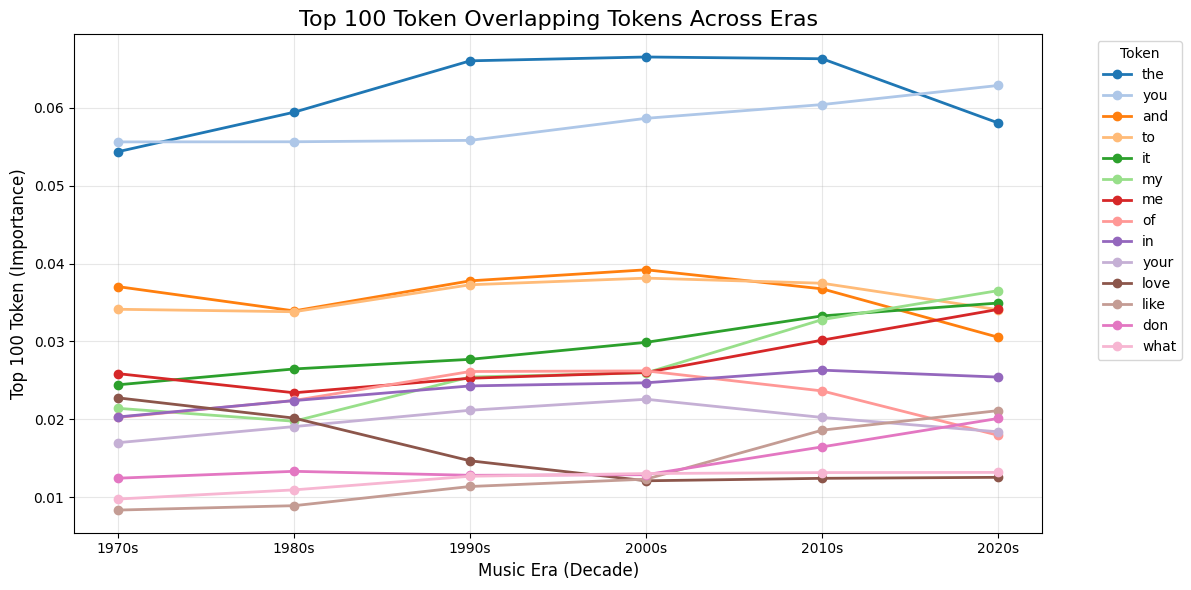

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Convert string data to a pandas DataFrame
df = pd.read_csv(io.StringIO(data))

# Convert 'era' to ordered categorical
era_order = ['1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
df['era'] = pd.Categorical(df['era'], categories=era_order, ordered=True)
df = df.sort_values('era')

# Select tokens to plot
tokens_to_plot = [
    'the', 'you', 'and', 'to', 'it', 'my', 'me', 'of', 'in', 'your',
    'love', 'like', 'don', 'what'
]
df_filtered = df[df['token'].isin(tokens_to_plot)]

# ============================
# Matplotlib Plot
# ============================
plt.figure(figsize=(12, 6))

# Color palette
palette = sns.color_palette("tab20", len(tokens_to_plot))

for i, token in enumerate(tokens_to_plot):
    df_token = df_filtered[df_filtered['token'] == token]
    plt.plot(
        df_token['era'],
        df_token['tfidf_score'],
        marker='o',
        markersize=6,
        linewidth=2,
        label=token,
        color=palette[i]
    )

plt.title("Top 100 Token Overlapping Tokens Across Eras", fontsize=16)
plt.xlabel("Music Era (Decade)", fontsize=12)
plt.ylabel("Top 100 Token (Importance)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title="Token", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()
